In [2558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Data

In [2559]:
df=pd.read_csv("Leads.csv")

In [2560]:
pd.set_option("display.max_columns",37)
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2561]:
df.shape

(9240, 37)

The data has 37 Columns and 9240 rows to start with. The Column __Converted__ is the Target column.

In [2562]:
df.info() #looking for information of the columns and checking to see if Null values exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

* All datatypes are correctly identified. Hence no need to do any processing on typecasting datatypes

In [2563]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking for Null values in the columns

In [2564]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [2565]:
(df.isna().sum()/len(df)*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

__The column $Lead Quality$ has missing values greater than 51%. Hence analysing this column further before dropping.__

In [2566]:
df["Lead Quality"].value_counts() #Probing all unique entries in this column

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [2567]:
df2=df.copy()

The entry of Lead quality though is based on intuition of the employee,
1. It seems to have a high accuracy of __94.62%__ for actual percentage of converts in the "High in Relevance" category.
2. Similarly it is __75.57%__ for "Might be" category
3. For "Low in Relevance" category it is 81.81%
4. For "Worst" category the accuracy of the lead not being converted is (1-1.99%) = 98.01%. Thus is highly negatively correlated.

In [2568]:
df2[df2["Lead Quality"]=="High in Relevance"].Converted.sum()/len(df2[df2["Lead Quality"]=="High in Relevance"])*100

94.66248037676608

In [2569]:
df2[df2["Lead Quality"]=="Might be"].Converted.sum()/len(df2[df2["Lead Quality"]=="Might be"])*100

75.57692307692308

In [2570]:
df2[df2["Lead Quality"]=="Low in Relevance"].Converted.sum()/len(df2[df2["Lead Quality"]=="Low in Relevance"])*100

81.81818181818183

In [2571]:
df2[df2["Lead Quality"]=="Not Sure"].Converted.sum()/len(df2[df2["Lead Quality"]=="Not Sure"])*100

24.358974358974358

In [2572]:
df2[df2["Lead Quality"]=="Worst"].Converted.sum()/len(df2[df2["Lead Quality"]=="Worst"])*100

1.9966722129783694

Thus this seems like important information that can aid the model predictions. Hence it will be useful to retain the column.
Further, all other entires such as- "Low in Relevance", "Not Sure" and "Blank" can be rolled up as __NA__ untill further analysis.

In [2573]:
df2["Lead Quality"]=np.where(df2["Lead Quality"]=="Low in Relevance" , np.nan, df2['Lead Quality'])
df2["Lead Quality"]=np.where(df2["Lead Quality"]=="Not Sure", np.nan, df2['Lead Quality'])

In [2574]:
len(df2[df2["Lead Quality"].isna()])

6442

In [2575]:
df2["Lead Quality"].value_counts()

Might be             1560
High in Relevance     637
Worst                 601
Name: Lead Quality, dtype: int64

## Dropping Columns with null values greater than 35%

In [2576]:
df=df.drop(["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index", "Asymmetrique Activity Score","Asymmetrique Profile Score","Tags"],axis=1)

In [2577]:
(df.isna().sum()/len(df)*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Analysing columns with less than 35% of Null Values

In [2578]:
(df.isna().sum()/len(df)*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [2579]:
df["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### Imputing "Lead Profile" where, currently "Lead Profile" is __Select__ and  __*Current Occupation*__ is Student as "Student of SomeSchool"

In [2580]:
df["Lead Profile"]=np.where(np.logical_and(df["Lead Profile"]=="Select", df["What is your current occupation"]=="Student"),"Student of SomeSchool",df["Lead Profile"])

In [2581]:
df["Lead Profile"].value_counts()

Select                         4087
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           300
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

For other values, the values in column __Lead Profile__ "Select" is as good as null value, thus all values of "Select" can be replaced by __Null__ as these are also missing values.

In [2582]:
df["Lead Profile"].replace("Select",np.nan,inplace=True)

In [2583]:
df["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           300
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [2584]:
df.isna().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

As the percentage of Nulls in __"Lead Profile"__ is more than 35%, this can be dropped

In [2585]:
df.drop("Lead Profile", axis=1,inplace=True)

In [2586]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

For the column _"What matters most to you in choosing a course"_ the missing values can be safely imputed as "Other" instead of the conventional way of imputing the mode value, which is "Better Career Prospects" in this case as the question is of aspiration and ttrying to impute the value of "Better Career Prospects" may not be right.

In [2587]:
df["What matters most to you in choosing a course"].replace(np.nan,"Other",inplace=True)

In [2588]:
df.isna().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [2589]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### It can safely be imputed that the missing value of current occupation as "other"

In [2590]:
df['What is your current occupation'].replace(np.nan,"Other",inplace=True)

In [2591]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2592]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Though the list of countries is large, there is a predominant concentration of leads from India, US and UAE, the rest including the Nulls can be grouped under Others.

In [2593]:
df["Country"]=np.where(np.logical_or(df["Country"]=="India", df["Country"]=="United States",df["Country"]=="United Arab Emirates"),df["Country"],"Other")

In [2594]:
df["Country"].value_counts()

C:\Users\Yashus G\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


India            6492
Other            2679
United States      69
Name: Country, dtype: int64

In [2595]:
df.isna().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [2596]:
df["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


#### Here "Select" is as good as Null, Thus replacing the "Select" values as _Null_

In [2597]:
df["How did you hear about X Education"].replace("Select",np.nan,inplace=True)

In [2598]:
df["How did you hear about X Education"].isna().sum()/len(df)*100

78.46320346320347

#### As the percentage of the Null values is greater than 35%, this column can be dropped

In [2599]:
df.drop("How did you hear about X Education",axis=1,inplace=True)

In [2600]:
df.isna().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   15.562771
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

In [2601]:
df["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Here, "Select" is as good as "Null". Thus, replacing "Select" with Null

In [2602]:
df["Specialization"].replace("Select",np.nan, inplace=True)

#### Here the missing values can be safely imputed as "Unknown"

In [2603]:
df["Specialization"].replace(np.nan,"Unknown", inplace=True)

In [2604]:
df.isna().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.0000

In [2605]:
df["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Here, "Select" is as good as "Null". Thus, replacing "Select" with Null

In [2606]:
df["City"].replace("Select",np.nan,inplace=True)

In [2607]:
df["City"].isna().sum()/len(df)*100

39.70779220779221

#### From the above output it can be seen that the null values contribute almost 10% of the values, also the predominant leads seem to be from Mumbai, thus this column can be safely dropped.

In [2608]:
df.drop("City",axis=1, inplace=True)

In [2609]:
df.isna().sum()/len(df)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

In [2610]:
df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### As the percentage of data points with Last activity as null is very low these can be dropped instead of imputing

In [2611]:
df3=df.dropna()

In [2612]:
df3.isna().sum()/len(df)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Thus, all null values are taken care of and we are left with 28 columns

In [2613]:
df3.shape

(9074, 28)

## Exploratory Data Analysis(EDA)

In [2614]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [2615]:
df3["Lead Origin"].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

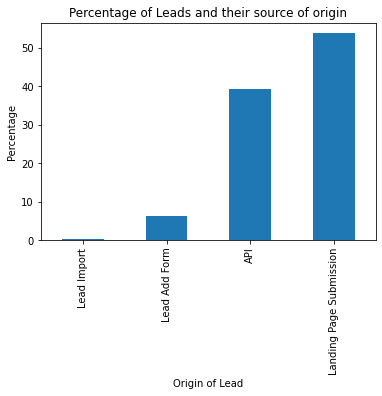

In [2616]:
(df3["Lead Origin"].value_counts()/len(df3)*100).sort_values().plot(kind="bar")
plt.title("Percentage of Leads and their source of origin")
plt.xlabel("Origin of Lead")
plt.ylabel("Percentage")
plt.show()

#### From the above plot, it can be seen that a majority of the leads originate from Landing Page Submission(>50%), this is followed by API(~40%)

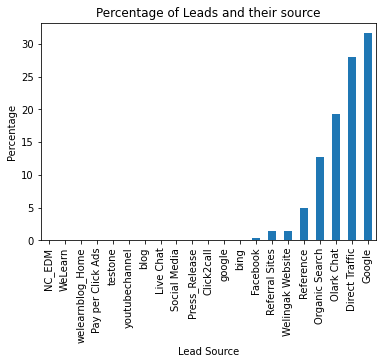

In [2617]:
(df3["Lead Source"].value_counts()/len(df3)*100).sort_values().plot(kind="bar")
plt.title("Percentage of Leads and their source")
plt.xlabel("Lead Source")
plt.ylabel("Percentage")
plt.show()

#### From the above plot it can be seen that a majority of the leads are from Google and Direct Traffic. Thus these can be considered as important sources for marketing strategy decisions

In [2618]:
df3["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [2619]:
df3["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

#### From the above values it can be seen that a majority of the Leads prefer to be called compared to being emailed. Thus it can be inferred that calling can be considered as a prefered medium in sales for Lead Nurturing compared to emails

C:\Users\Yashus G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalVisits'>

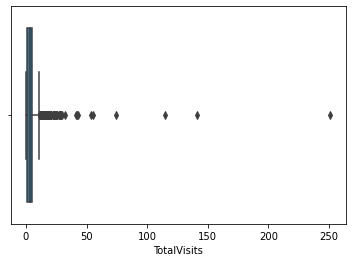

In [2620]:
sns.boxplot(df3["TotalVisits"])

#### From the above boxplot it can be seen that Values greater than 100 can be considerd as outliers and can be removed as these high number of visits can be considered as outliers(only 3 values out of more than 9000 data points)

In [2621]:
df3=df3[df3["TotalVisits"]<100]

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

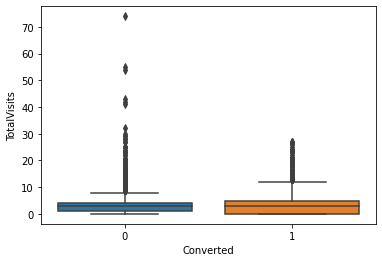

In [2622]:
sns.boxplot(y="TotalVisits", x="Converted", data=df3)

#### From the Above plot it can be seen that on an average, more number of visits implies a higher tendency for conversion.
#### But it should also be noted that as the number visits crosses 20, the tendency for Lead conversion decreases

<AxesSubplot:>

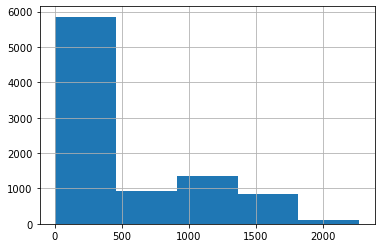

In [2623]:
df3["Total Time Spent on Website"].hist(bins=5)

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

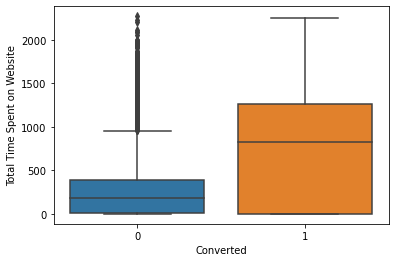

In [2624]:
sns.boxplot(y="Total Time Spent on Website", x="Converted", data=df3)

#### From the above box plot it can be clearly seen that a higher time spent on the website leads to a higher chance of successful conversion. Which is also inline with intuitive understanding.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

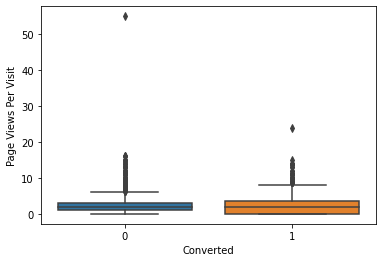

In [2625]:
sns.boxplot(y="Page Views Per Visit", x="Converted", data=df3)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

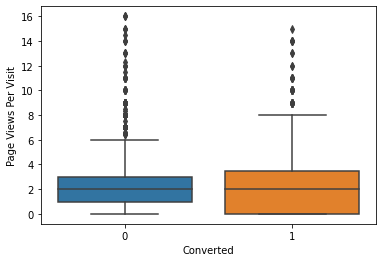

In [2626]:
df4=df3[df3["Page Views Per Visit"]<20]
sns.boxplot(y="Page Views Per Visit", x="Converted", data=df4)

#### From the above plot, it can be seen that there is no major difference in the number of pages viewed per visit between successful and unsuccessful leads. Thus there should be a focus on improving quality of information provided per page rather than just increasing the number of pages. Focusing on Concise communication of information compared to Quantity of information.

<AxesSubplot:ylabel='Last Activity'>

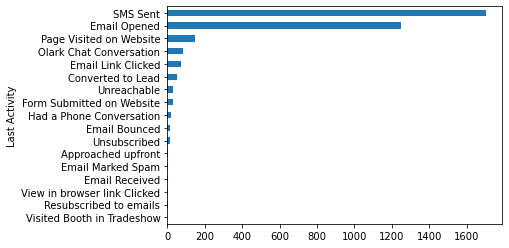

In [2627]:
df3.groupby("Last Activity")["Converted"].sum().sort_values().plot(kind="barh")

#### From the above plot, it can be seen that sending SMS and emails are better ways to achieve lead conversion. Which indicates that the sale of courses happens as a "Push marketing" rather than "Pull Marketing".

<AxesSubplot:>

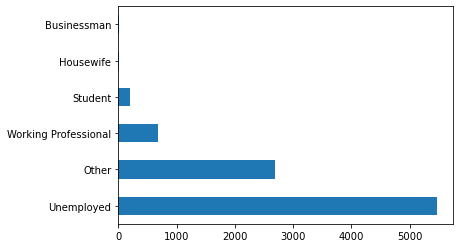

In [2628]:
df3["What is your current occupation"].value_counts().plot(kind="barh")

#### From the above plot it can be seen that People who are currently unemployed contibute to higher number of leads for the business. This information can be used to target potential learners and also in designing of courses to meet the requirements of the respective customer segment.

In [2629]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9071 non-null   object 
 1   Lead Number                                    9071 non-null   int64  
 2   Lead Origin                                    9071 non-null   object 
 3   Lead Source                                    9071 non-null   object 
 4   Do Not Email                                   9071 non-null   object 
 5   Do Not Call                                    9071 non-null   object 
 6   Converted                                      9071 non-null   int64  
 7   TotalVisits                                    9071 non-null   float64
 8   Total Time Spent on Website                    9071 non-null   int64  
 9   Page Views Per Visit                           9071 

<AxesSubplot:>

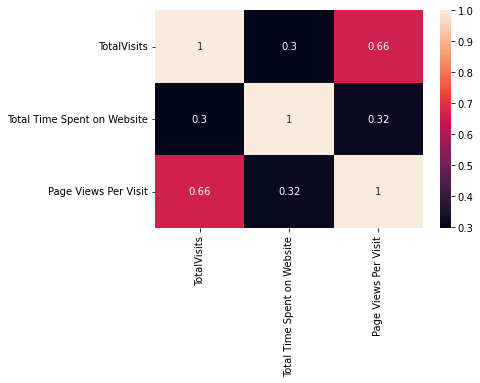

In [2630]:
numeric_var=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

sns.heatmap(df3[numeric_var].corr(), annot=True)

#### From the above heat map it can be seen that there is a noticable positive correlation, between "TotalVisits" and "Page Views per Visit".

## Data preparation for Modelling

In [2631]:
df4=df3.copy() #Creating a copy as a backup of the dataset

In [2632]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9071 non-null   object 
 1   Lead Number                                    9071 non-null   int64  
 2   Lead Origin                                    9071 non-null   object 
 3   Lead Source                                    9071 non-null   object 
 4   Do Not Email                                   9071 non-null   object 
 5   Do Not Call                                    9071 non-null   object 
 6   Converted                                      9071 non-null   int64  
 7   TotalVisits                                    9071 non-null   float64
 8   Total Time Spent on Website                    9071 non-null   int64  
 9   Page Views Per Visit                           9071 

### Creating dummies for categorical columns

In [2633]:
#df3=df4.copy()

In [2634]:
temp_df=pd.get_dummies(df3["Lead Origin"],prefix="LeadOrigin", drop_first=True)
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("Lead Origin", axis=1,inplace=True) #Dropping the Original Lead Origin column after creating dummies

In [2635]:
temp_df=pd.get_dummies(df3["Lead Source"],prefix="LeadSource", drop_first=True)
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("Lead Source", axis=1,inplace=True) #Dropping the Original Lead Source column after creating dummies

In [2636]:
df3["Do Not Email"]=df3["Do Not Email"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0

In [2637]:
df3["Do Not Call"]=df3["Do Not Call"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0

In [2638]:
temp_df=pd.get_dummies(df3["Last Activity"],prefix="LastActivity", drop_first=True)
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("Last Activity", axis=1,inplace=True) #Dropping the Original Last Activity column after creating dummies

In [2639]:
df3["Country"].value_counts()

India            6488
Other            2514
United States      69
Name: Country, dtype: int64

In [2640]:
temp_df=pd.get_dummies(df3["Country"],prefix="Country", drop_first=True) #The same logic can be applied here to create dummies
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("Country", axis=1,inplace=True) #Dropping the Original Country column after creating dummies

In [2641]:
df3["Specialization"].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             836
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               345
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2642]:
temp_df=pd.get_dummies(df3["Specialization"],prefix="Specialization", drop_first=True) #The same logic can be applied here to create dummies
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("Specialization", axis=1,inplace=True) #Dropping the Original Specialization column after creating dummies

In [2643]:
temp_df=pd.get_dummies(df3["What is your current occupation"],prefix="CurrentOccupation", drop_first=True) #The same logic can be applied here to create dummies
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("What is your current occupation", axis=1,inplace=True) #Dropping the Original What is your current occupation column after creating dummies

In [2644]:
temp_df=pd.get_dummies(df3["What matters most to you in choosing a course"],prefix="Outcome", drop_first=True) #The same logic can be applied here to create dummies
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("What matters most to you in choosing a course", axis=1,inplace=True) #Dropping the Original What matters most to you in choosing this course column after creating dummies

In [2645]:
df3["Search"]=df3["Search"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Magazine"]=df3["Magazine"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Newspaper Article"]=df3["Newspaper Article"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["X Education Forums"]=df3["X Education Forums"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Newspaper"]=df3["Newspaper"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Digital Advertisement"]=df3["Digital Advertisement"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Through Recommendations"]=df3["Through Recommendations"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Receive More Updates About Our Courses"]=df3["Receive More Updates About Our Courses"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Update me on Supply Chain Content"]=df3["Update me on Supply Chain Content"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["Get updates on DM Content"]=df3["Get updates on DM Content"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["I agree to pay the amount through cheque"]=df3["I agree to pay the amount through cheque"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0
df3["A free copy of Mastering The Interview"]=df3["A free copy of Mastering The Interview"].apply(lambda x: 1 if x=="Yes" else 0) #Replacing Binary vlaues with 0 OR 1. Yes:1 while No:0

In [2646]:
temp_df=pd.get_dummies(df3["Last Notable Activity"],prefix="LastNotableActivity", drop_first=True) #The same logic can be applied here to create dummies
df3=pd.concat([df3,temp_df],axis=1) #Creating dummies for categorical column
df3.drop("Last Notable Activity", axis=1,inplace=True) #Dropping the Original What matters most to you in choosing this course column after creating dummies

In [2647]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9239
Columns: 101 entries, Prospect ID to LastNotableActivity_View in browser link Clicked
dtypes: float64(2), int64(17), object(1), uint8(81)
memory usage: 2.2+ MB


## Model Building

In [2648]:
df5=df3.copy() #Keeping a copy as backup

In [2649]:
#Splitting data into Train and Test Datasets
from sklearn.model_selection import train_test_split

df_train, df_test= train_test_split(df3, train_size=0.7, test_size=0.3, random_state=100)

In [2650]:
#"Prospect ID" and "Lead Number" can be dropped as these are identifier values assigned to the leads
df_train.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)
df_test.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)

In [2651]:
# Scaling the Features to bring all numerical values into same scale 
# and avoid the effect of scales on the coeeficients of the model.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train=scaler.fit_transform(df_train)
df_test=scaler.transform(df_test)

In [2652]:
df_train=pd.DataFrame(df_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,...,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,0.0,0.0,0.0,0.040541,0.040933,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.067568,0.697183,0.104167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.054054,0.433099,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.040541,0.527729,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [2653]:
df3.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)
df_train.columns=df3.columns

In [2654]:
df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,...,CurrentOccupation_Working Professional,Outcome_Flexibility & Convenience,Outcome_Other,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0.0,0.0,0.0,0.040541,0.040933,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.067568,0.697183,0.104167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.054054,0.433099,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.040541,0.527729,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [2655]:
# Dividing into X and y sets for Model Building
y_train=df_train.pop('Converted')
X_train=df_train

In [2656]:
#Importing linear model and RFE for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [2657]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

C:\Users\Yashus G\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yashus G\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [2658]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 17),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 20),
 ('Magazine', False, 72),
 ('Newspaper Article', False, 14),
 ('X Education Forums', False, 56),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', False, 22),
 ('Receive More Updates About Our Courses', False, 73),
 ('Update me on Supply Chain Content', False, 74),
 ('Get updates on DM Content', False, 77),
 ('I agree to pay the amount through cheque', False, 78),
 ('A free copy of Mastering The Interview', False, 66),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 54),
 ('LeadSource_Direct Traffic', False, 33),
 ('LeadSource_Facebook', False, 64),
 ('LeadSource_Google', False, 36),
 ('LeadSource_Live Chat', False, 39),
 ('LeadSource_NC_EDM', False, 7),
 ('LeadSource_Olark Chat', Tr

In [2659]:
col = X_train.columns[rfe.support_] # to select the features where RFE has returned True
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'Specialization_Unknown', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Working Professional', 'Outcome_Other',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_Unreachable'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [2660]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2661]:
import statsmodels.api as sm

In [2662]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.0
Date:                Tue, 24 Jan 2023   Deviance:                       5020.1
Time:                        17:40:20   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4166
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9491      0.153     -6.216      0.000      -1.248      -0.650
Do Not Email                                    -1.4063      0.179     -7.844      0.000      -1.758      -1.055
TotalVisits                                      2.7336      0.885      3.089      0.002       0.999       4.468
Total Time Spent on Website                      4.5140      0.171     26.397      0.000       4.179       4.849
Page Views Per Visit                            -1.5257      0.599     -2.547      0.011      -2.700      -0.352
LeadOrigin_Landing Page Submission              -1.0070      0.129     -7.780      0.000      -1.261      -0.753
LeadOrigin_Lead Add Form                         1.3188      0.914      1.442      0.149      -0.473       3.111
LeadSource_Olark Chat                            1.1970      0.137      8.737      0.000       0.928       1.466
LeadSource_Reference                             1.7517      0.935      1.873      0.061      -0.081       3.584
LeadSource_Welingak Website                      3.9668      1.165      3.406      0.001       1.684       6.249
LastActivity_Had a Phone Conversation            1.2507      0.867      1.442      0.149      -0.449       2.951
LastActivity_Olark Chat Conversation            -1.0460      0.181     -5.787      0.000      -1.400      -0.692
LastActivity_SMS Sent                            1.3388      0.077     17.313      0.000       1.187       1.490
Specialization_Unknown                          -1.0069      0.128     -7.893      0.000      -1.257      -0.757
CurrentOccupation_Housewife                     22.6903   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
CurrentOccupation_Working Professional           2.4779      0.196     12.630      0.000       2.093       2.862
Outcome_Other                                   -1.1349      0.090    -12.593      0.000      -1.312      -0.958
LastNotableActivity_Had a Phone Conversation     1.7440      1.460      1.195      0.232      -1.118       4.606
LastNotableActivity_Modified                    -0.7714      0.084     -9.187      0.000      -0.936      -0.607
LastNotableActivity_Resubscribed to emails      24.4600   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
LastNotableActivity_Unreachable                  1.5080      0.510      2.957      0.003       0.509       2.507
================================================================================================================
"""

In [2663]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2664]:
logreg.fit(X_train_rfe,y_train)
y_pred = logreg.predict(X_train_rfe)

In [2665]:
accuracy_score(y_train,y_pred) #Train set accuracy

0.8177665774137659

In [2666]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      3927
         1.0       0.79      0.71      0.75      2422

    accuracy                           0.82      6349
   macro avg       0.81      0.80      0.80      6349
weighted avg       0.82      0.82      0.82      6349



#### Checking VIFs

In [2667]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2668]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,LeadOrigin_Lead Add Form,59.96
7,LeadSource_Reference,47.50
8,LeadSource_Welingak Website,13.64
3,Page Views Per Visit,4.88
4,LeadOrigin_Landing Page Submission,3.57
1,TotalVisits,3.38
12,Specialization_Unknown,2.73
16,LastNotableActivity_Had a Phone Conversation,2.26
9,LastActivity_Had a Phone Conversation,2.26
2,Total Time Spent on Website,2.13


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'LeadOrigin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [2669]:
col=col.drop("LeadOrigin_Lead Add Form",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Landing Page Submission',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'Specialization_Unknown', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Working Professional', 'Outcome_Other',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Resubscribed to emails',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [2670]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2511.2
Date:                Tue, 24 Jan 2023   Deviance:                       5022.4
Time:                        17:40:21   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4164
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9260      0.152     -6.097      0.000      -1.224      -0.628
Do Not Email                                    -1.4076      0.179     -7.853      0.000      -1.759      -1.056
TotalVisits                                      2.7108      0.885      3.064      0.002       0.977       4.445
Total Time Spent on Website                      4.5079      0.171     26.392      0.000       4.173       4.843
Page Views Per Visit                            -1.5566      0.599     -2.599      0.009      -2.730      -0.383
LeadOrigin_Landing Page Submission              -1.0215      0.129     -7.912      0.000      -1.275      -0.768
LeadSource_Olark Chat                            1.1869      0.137      8.687      0.000       0.919       1.455
LeadSource_Reference                             3.0527      0.246     12.395      0.000       2.570       3.535
LeadSource_Welingak Website                      5.2727      0.733      7.198      0.000       3.837       6.708
LastActivity_Had a Phone Conversation            1.2486      0.867      1.440      0.150      -0.451       2.948
LastActivity_Olark Chat Conversation            -1.0491      0.181     -5.805      0.000      -1.403      -0.695
LastActivity_SMS Sent                            1.3394      0.077     17.322      0.000       1.188       1.491
Specialization_Unknown                          -1.0170      0.127     -7.983      0.000      -1.267      -0.767
CurrentOccupation_Housewife                     22.6862   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
CurrentOccupation_Working Professional           2.4745      0.196     12.612      0.000       2.090       2.859
Outcome_Other                                   -1.1371      0.090    -12.622      0.000      -1.314      -0.961
LastNotableActivity_Had a Phone Conversation     1.7438      1.460      1.194      0.232      -1.118       4.606
LastNotableActivity_Modified                    -0.7726      0.084     -9.205      0.000      -0.937      -0.608
LastNotableActivity_Resubscribed to emails      24.4593   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
LastNotableActivity_Unreachable                  1.5059      0.510      2.952      0.003       0.506       2.506
================================================================================================================
"""

#### The Column "LastNotableActivity_Resubscribed to emails" has a high P-value denoting that it is not statistically significant towards the model prediction, Thus dropping this column

In [2671]:
col=col.drop("LastNotableActivity_Resubscribed to emails",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'LeadOrigin_Landing Page Submission',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'Specialization_Unknown', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Working Professional', 'Outcome_Other',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

In [2672]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6349
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.2
Date:                Tue, 24 Jan 2023   Deviance:                       5026.4
Time:                        17:40:21   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4160
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9263      0.152     -6.100      0.000      -1.224      -0.629
Do Not Email                                    -1.4079      0.179     -7.856      0.000      -1.759      -1.057
TotalVisits                                      2.7059      0.885      3.059      0.002       0.972       4.440
Total Time Spent on Website                      4.5065      0.171     26.390      0.000       4.172       4.841
Page Views Per Visit                            -1.5555      0.599     -2.598      0.009      -2.729      -0.382
LeadOrigin_Landing Page Submission              -1.0203      0.129     -7.904      0.000      -1.273      -0.767
LeadSource_Olark Chat                            1.1921      0.137      8.729      0.000       0.924       1.460
LeadSource_Reference                             3.0535      0.246     12.399      0.000       2.571       3.536
LeadSource_Welingak Website                      5.2730      0.733      7.198      0.000       3.837       6.709
LastActivity_Had a Phone Conversation            1.2496      0.867      1.441      0.149      -0.450       2.949
LastActivity_Olark Chat Conversation            -1.0531      0.181     -5.830      0.000      -1.407      -0.699
LastActivity_SMS Sent                            1.3374      0.077     17.303      0.000       1.186       1.489
Specialization_Unknown                          -1.0154      0.127     -7.971      0.000      -1.265      -0.766
CurrentOccupation_Housewife                     22.6861   1.44e+04      0.002      0.999   -2.82e+04    2.82e+04
CurrentOccupation_Working Professional           2.4750      0.196     12.615      0.000       2.090       2.859
Outcome_Other                                   -1.1324      0.090    -12.586      0.000      -1.309      -0.956
LastNotableActivity_Had a Phone Conversation     1.7409      1.460      1.193      0.233      -1.120       4.602
LastNotableActivity_Modified                    -0.7740      0.084     -9.225      0.000      -0.938      -0.610
LastNotableActivity_Unreachable                  1.5030      0.510      2.948      0.003       0.504       2.502
================================================================================================================
"""

In [2673]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.067804
1    0.070652
2    0.855626
3    0.795629
4    0.843469
5    0.997374
6    1.000000
7    0.821943
8    0.358753
9    0.029716
dtype: float64

In [2674]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06780391, 0.07065217, 0.85562593, 0.79562897, 0.84346931,
       0.99737385, 1.        , 0.82194314, 0.35875285, 0.02971609])

In [2675]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID
0,0.0,0.067804,0
1,0.0,0.070652,1
2,1.0,0.855626,2
3,1.0,0.795629,3
4,1.0,0.843469,4


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [2676]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Convert,Convert_Prob,Prospect ID,predicted
0,0.0,0.067804,0,0
1,0.0,0.070652,1,0
2,1.0,0.855626,2,1
3,1.0,0.795629,3,1
4,1.0,0.843469,4,1


In [2677]:
from sklearn import metrics

In [2678]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3483  444]
 [ 713 1709]]


In [2679]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8177665774137659


#The accuracy has not dropped

#### Checking the VIFs again

In [2680]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.88
4,LeadOrigin_Landing Page Submission,3.57
1,TotalVisits,3.38
11,Specialization_Unknown,2.73
8,LastActivity_Had a Phone Conversation,2.26
15,LastNotableActivity_Had a Phone Conversation,2.26
2,Total Time Spent on Website,2.13
5,LeadSource_Olark Chat,2.09
16,LastNotableActivity_Modified,1.79
14,Outcome_Other,1.65


All variables have a good value of VIF. Hence, there is no need to drop any more variables and proceeding to make predictions using this model only

In [2681]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3483,  444],
       [ 713, 1709]], dtype=int64)

In [2682]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted)

0.8177665774137659

In [2683]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2684]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.7056151940545005

In [2685]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
specificity

0.8869365928189458

In [2686]:
# Calculate false postive rate - predicting as lead when customer did not convert to a lead
print(FP/ float(TN+FP))

0.11306340718105425


In [2687]:
# positive predictive value 
print (TP / float(TP+FP))

0.793776126335346


In [2688]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8300762631077216


#### Plotting ROC curve

In [2689]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2690]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

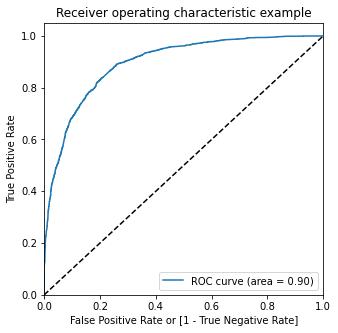

In [2691]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### The Area Under Curve(AUC) is 0.9, which is a good value for AUC

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [2692]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.067804,0,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.070652,1,0,1,0,0,0,0,0,0,0,0,0
2,1.0,0.855626,2,1,1,1,1,1,1,1,1,1,1,0
3,1.0,0.795629,3,1,1,1,1,1,1,1,1,1,0,0
4,1.0,0.843469,4,1,1,1,1,1,1,1,1,1,1,0


In [2693]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381477  1.000000  0.000000
0.1   0.1  0.642936  0.972337  0.439776
0.2   0.2  0.767680  0.915772  0.676343
0.3   0.3  0.799968  0.872832  0.755029
0.4   0.4  0.817294  0.784476  0.837535
0.5   0.5  0.817767  0.705615  0.886937
0.6   0.6  0.810994  0.633361  0.920550
0.7   0.7  0.787053  0.530966  0.944996
0.8   0.8  0.765632  0.433526  0.970461
0.9   0.9  0.720586  0.287366  0.987777


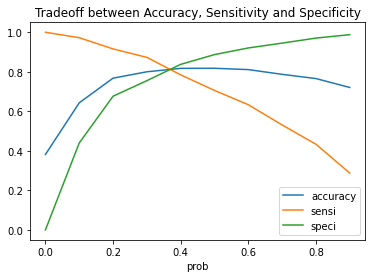

In [2694]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Tradeoff between Accuracy, Sensitivity and Specificity")
plt.show()

#### From the plot it can be seen that a probability of 40% can be used as the cutoff for having a balanced sensitivity-specificity

In [2695]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.067804,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.070652,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,0.855626,2,1,1,1,1,1,1,1,1,1,1,0,1
3,1.0,0.795629,3,1,1,1,1,1,1,1,1,1,0,0,1
4,1.0,0.843469,4,1,1,1,1,1,1,1,1,1,1,0,1


In [2696]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.8172940620570168

In [2697]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3289,  638],
       [ 522, 1900]], dtype=int64)

In [2698]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2699]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7844756399669695

In [2700]:
# Let us calculate specificity
TN / float(TN+FP)

0.8375350140056023

In [2701]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16246498599439776


In [2702]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7486209613869188


In [2703]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8630280766203097


### Evaluating on Test set

In [2704]:
df_test=pd.DataFrame(df_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,...,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,0.0,0.0,1.0,0.121622,0.038292,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.054054,0.634243,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.094595,0.026408,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.013514,0.018486,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.013514,0.084507,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2705]:
df_test.columns=df3.columns

In [2706]:
df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,...,CurrentOccupation_Working Professional,Outcome_Flexibility & Convenience,Outcome_Other,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0.0,0.0,1.0,0.121622,0.038292,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.054054,0.634243,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.094595,0.026408,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.013514,0.018486,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.013514,0.084507,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2707]:
# Dividing into X and y sets for Model Building
y_test=df_test.pop('Converted')
X_test=df_test

In [2708]:
# Creating X_train dataframe with RFE selected variables
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Landing Page Submission,LeadSource_Olark Chat,LeadSource_Reference,LeadSource_Welingak Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,Specialization_Unknown,CurrentOccupation_Housewife,CurrentOccupation_Working Professional,Outcome_Other,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
0,0.0,0.121622,0.038292,0.187500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.054054,0.634243,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.094595,0.026408,0.291667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.013514,0.018486,0.041667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.013514,0.084507,0.041667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [2709]:
X_test_sm = sm.add_constant(X_test)

#### Making Predictions on Test set

In [2710]:
y_test_pred = res.predict(X_test_sm)

In [2711]:
y_test_pred[:10]

0    0.401499
1    0.273247
2    0.116569
3    0.065035
4    0.002668
5    0.090763
6    0.523034
7    0.050444
8    0.932078
9    0.116891
dtype: float64

In [2712]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

,0
0,0.401499
1,0.273247
2,0.116569
3,0.065035
4,0.002668
...,...
2717,0.452514
2718,0.994220
2719,0.038118
2720,0.997374


In [2713]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
2717,1.0
2718,1.0
2719,0.0
2720,1.0


In [2714]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2715]:
y_pred_final.head()

,Converted,0
0,1.0,0.401499
1,0.0,0.273247
2,0.0,0.116569
3,1.0,0.065035
4,0.0,0.002668


In [2716]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [2717]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [2718]:
y_pred_final.head()

,Converted,Convert_Prob,final_predicted
0,1.0,0.401499,1
1,0.0,0.273247,0
2,0.0,0.116569,0
3,1.0,0.065035,0
4,0.0,0.002668,0


In [2719]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8152094048493754

#### It can be seen that there is only a reduction of 3% from train set accuracy

In [2720]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1435,  275],
       [ 228,  784]], dtype=int64)

In [2721]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2722]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7747035573122529

In [2723]:
# Let us calculate specificity
TN / float(TN+FP)

0.8391812865497076

In [2724]:
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map(lambda x: x*100)

In [2725]:
y_pred_final.head(10)

,Converted,Convert_Prob,final_predicted,Lead_Score
0,1.0,0.401499,1,40.149915
1,0.0,0.273247,0,27.324713
2,0.0,0.116569,0,11.656875
3,1.0,0.065035,0,6.503480
4,0.0,0.002668,0,0.266788
5,0.0,0.090763,0,9.076263
6,0.0,0.523034,1,52.303413
7,0.0,0.050444,0,5.044443
8,1.0,0.932078,1,93.207789
9,0.0,0.116891,0,11.689104


#### The column "Lead_Score" is the value that the company may use to target leads. A score greater than 40 can be considered as a "Hot Lead" while a value lesser than 40 can be considered a "Cold Lead", The accuracy of a lead converting would be approximately 81.45% using the developed Logistic regression model.
> 1. The model takes in to account 19 variables to predict if the potential lead would convert or not based on the historic data.</br>

In [2726]:
df.Converted.sum()/len(df)

0.3853896103896104

> 2. The model improves resource usage by enabling focus onto "Hot Leads". Thus improving conversion rate from the earlier 38.53% to around 80% by sales personal focussing on the "Hot Leads".
